In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.somlib as som
%matplotlib inline

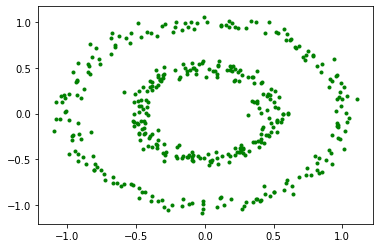

In [10]:
from sklearn.datasets import make_circles
# xy, clas = make_circles(n_samples=400, shuffle=True, noise=0.05, random_state=None, factor=0.9)
xy, clas = make_circles(n_samples=400, shuffle=True, noise=0.05, random_state=None, factor=0.5)
x = xy[:,0]
y = xy[:,1]
plt.scatter(x, y, marker='.', color='g')

## Continuous Visualization

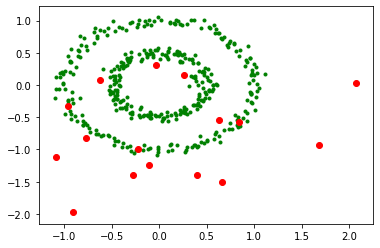

In [11]:
mysom = som.SOM2D(2, (4,4), learning_rate=1, sigma=0.5, decay_rate=0.9999999)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

EPOCHS = 5
for epoch in range(EPOCHS):
    print('EPOCHS', epoch)
    print(f'lr={mysom.learning_rate}, sigma={mysom.sigma}')
    sample_indx = np.random.permutation(len(xy))
    for i, indx in enumerate(sample_indx):
        mysom._calculate_vector_distance_(xy[indx])
        mysom._calculate_neighbourhood_influence_()
        mysom._calculate_gradients_()
        mysom._update_()
        
        if i%20 ==0:
            ax.clear()
            plt.scatter(x, y, marker='.', color='g')
            plt.scatter(mysom.weights[0], mysom.weights[1], color='r')
            fig.canvas.draw()
            plt.pause(0.001)
        
    mysom._decay_()
plt.close()

EPOCHS 0
lr=1, sigma=0.5
EPOCHS 1
lr=0.5000000250000012, sigma=0.2500000125000006
EPOCHS 2
lr=0.16666668611111277, sigma=0.08333334305555638
EPOCHS 3
lr=0.04166667465277879, sigma=0.020833337326389395
EPOCHS 4
lr=0.008333335597222605, sigma=0.004166667798611303


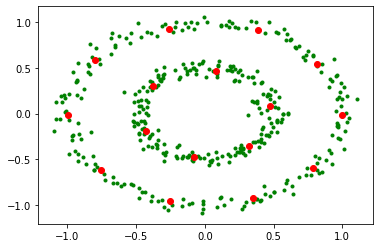

In [13]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(mysom.weights[0], mysom.weights[1], color='r')